<a href="https://colab.research.google.com/github/benassafma/441B-BenAssaf/blob/main/ECON_441B_HW6_Submission_(Mohanad_Ben_Assaf_505631393).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")


In [4]:
df

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,2,198.234764,18,0,1,1,1,0,0,0,0,1,0,1,0
9130,9130,3096.511217,21604,1,379.200000,14,0,1,0,1,0,0,0,1,0,1,0,0
9131,9131,8163.890428,0,2,790.784983,9,0,1,1,0,0,0,1,1,0,0,0,1
9132,9132,7524.442436,21941,3,691.200000,34,1,0,1,1,0,0,0,0,1,0,1,0


In [5]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [13]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (5,20,),(10,50,),(10,100,10,),(50,100,25,5,)], 
    "activation" : ['relu','logistic'],
    'alpha':[0.0001,0.001, 0.01]
}

In [14]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                (10, 100, 10),
                                                (50, 100, 25, 5)]})

In [15]:
print('Best Parameters:',grid.best_params_)
print('Best Score:',grid.best_score_)

Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 25, 5)}
Best Score: 0.16163852590800834


# 3.) Train a model with the optimal solution from GridSearch

In [16]:
MLPRegressor(**grid.best_params_)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(50, 100, 25, 5))

In [25]:
p_dict = {
    "hidden_layer_sizes": (50, 100, 25, 5), 
    "activation" : 'relu',
}

mlp = MLPRegressor(**p_dict, solver='adam',max_iter = 1000)

In [26]:
mlp.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=(50, 100, 25, 5), max_iter=1000)

# 4.) What are the in-sample and out of sample MSEs

In [18]:
from sklearn.metrics import mean_squared_error

In [27]:
ypred = mlp.predict(X_train)
ypreds = mlp.predict(X_test)

In [29]:
MSE_Train = mean_squared_error(y_train, ypred)
MSE_Test = mean_squared_error(y_test, ypreds)
print('Train MSE = ',MSE_Train)
print('Test MSE = ', MSE_Test)

Train MSE =  13555186.47736337
Test MSE =  22531263.30432404


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [31]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [33]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

In [34]:
model.compile(loss='mse',optimizer=Adam(lr=0.01))
model.fit(X_train,y_train,batch_size=32,epochs=100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 111450544.0000
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 111450544.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 111450536.0000
Epoch 4/100
200/200 [==============================] - 2s 9ms/step - loss: 111450520.0000
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 111450536.0000
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 111450568.0000
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 111450584.0000
Epoch 8/100
200/200 [==============================] - 1s 5ms/step - loss: 111450536.0000
Epoch 9/100
200/200 [==============================] - 1s 3ms/step - loss: 111450520.0000
Epoch 10/100
200/200 [==============================] - 1s 3ms/step - loss: 111450520.0000
Epoch 11/100
200/200 [==============================] - 1s 3ms/step - loss: 111450512.0000
Epoch 12

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 5)                 130       
                                                                 
Total params: 8,605
Trainable params: 8,605
Non-trainable params: 0
_________________________________________________________________


# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [36]:
from tensorflow.keras.utils import plot_model

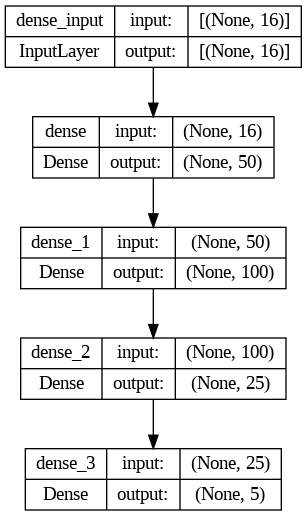

In [37]:
plot_model(model, show_shapes=True)

In [40]:
pip install ann-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=0457e32d6cace142df79f59fc9c4b376a7eaea91e4eeeeeed3b127feb5f9206e
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann-visualizer


In [41]:
from ann_visualizer.visualize import ann_viz

In [55]:
ann_viz(model, title = "MLP NN Viz",filename="/content/gdrive/MyDrive/ECON441B/mlp_model")

In [49]:
pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from pdf2image import convert_from_path

In [61]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 174 kB of archives.
After this operation, 754 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 poppler-utils amd64 0.86.1-0ubuntu1.1 [174 kB]
Fetched 174 kB in 1s (128 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.86.1-0ubuntu1.1_amd64.deb ...
Unpacking poppler-utils (0.86.1-0ubuntu1.1) ...
Setting up poppler-utils (0.86.1-0ubuntu1.1) ...
Processing triggers for man-db (2.9.1-1) ...


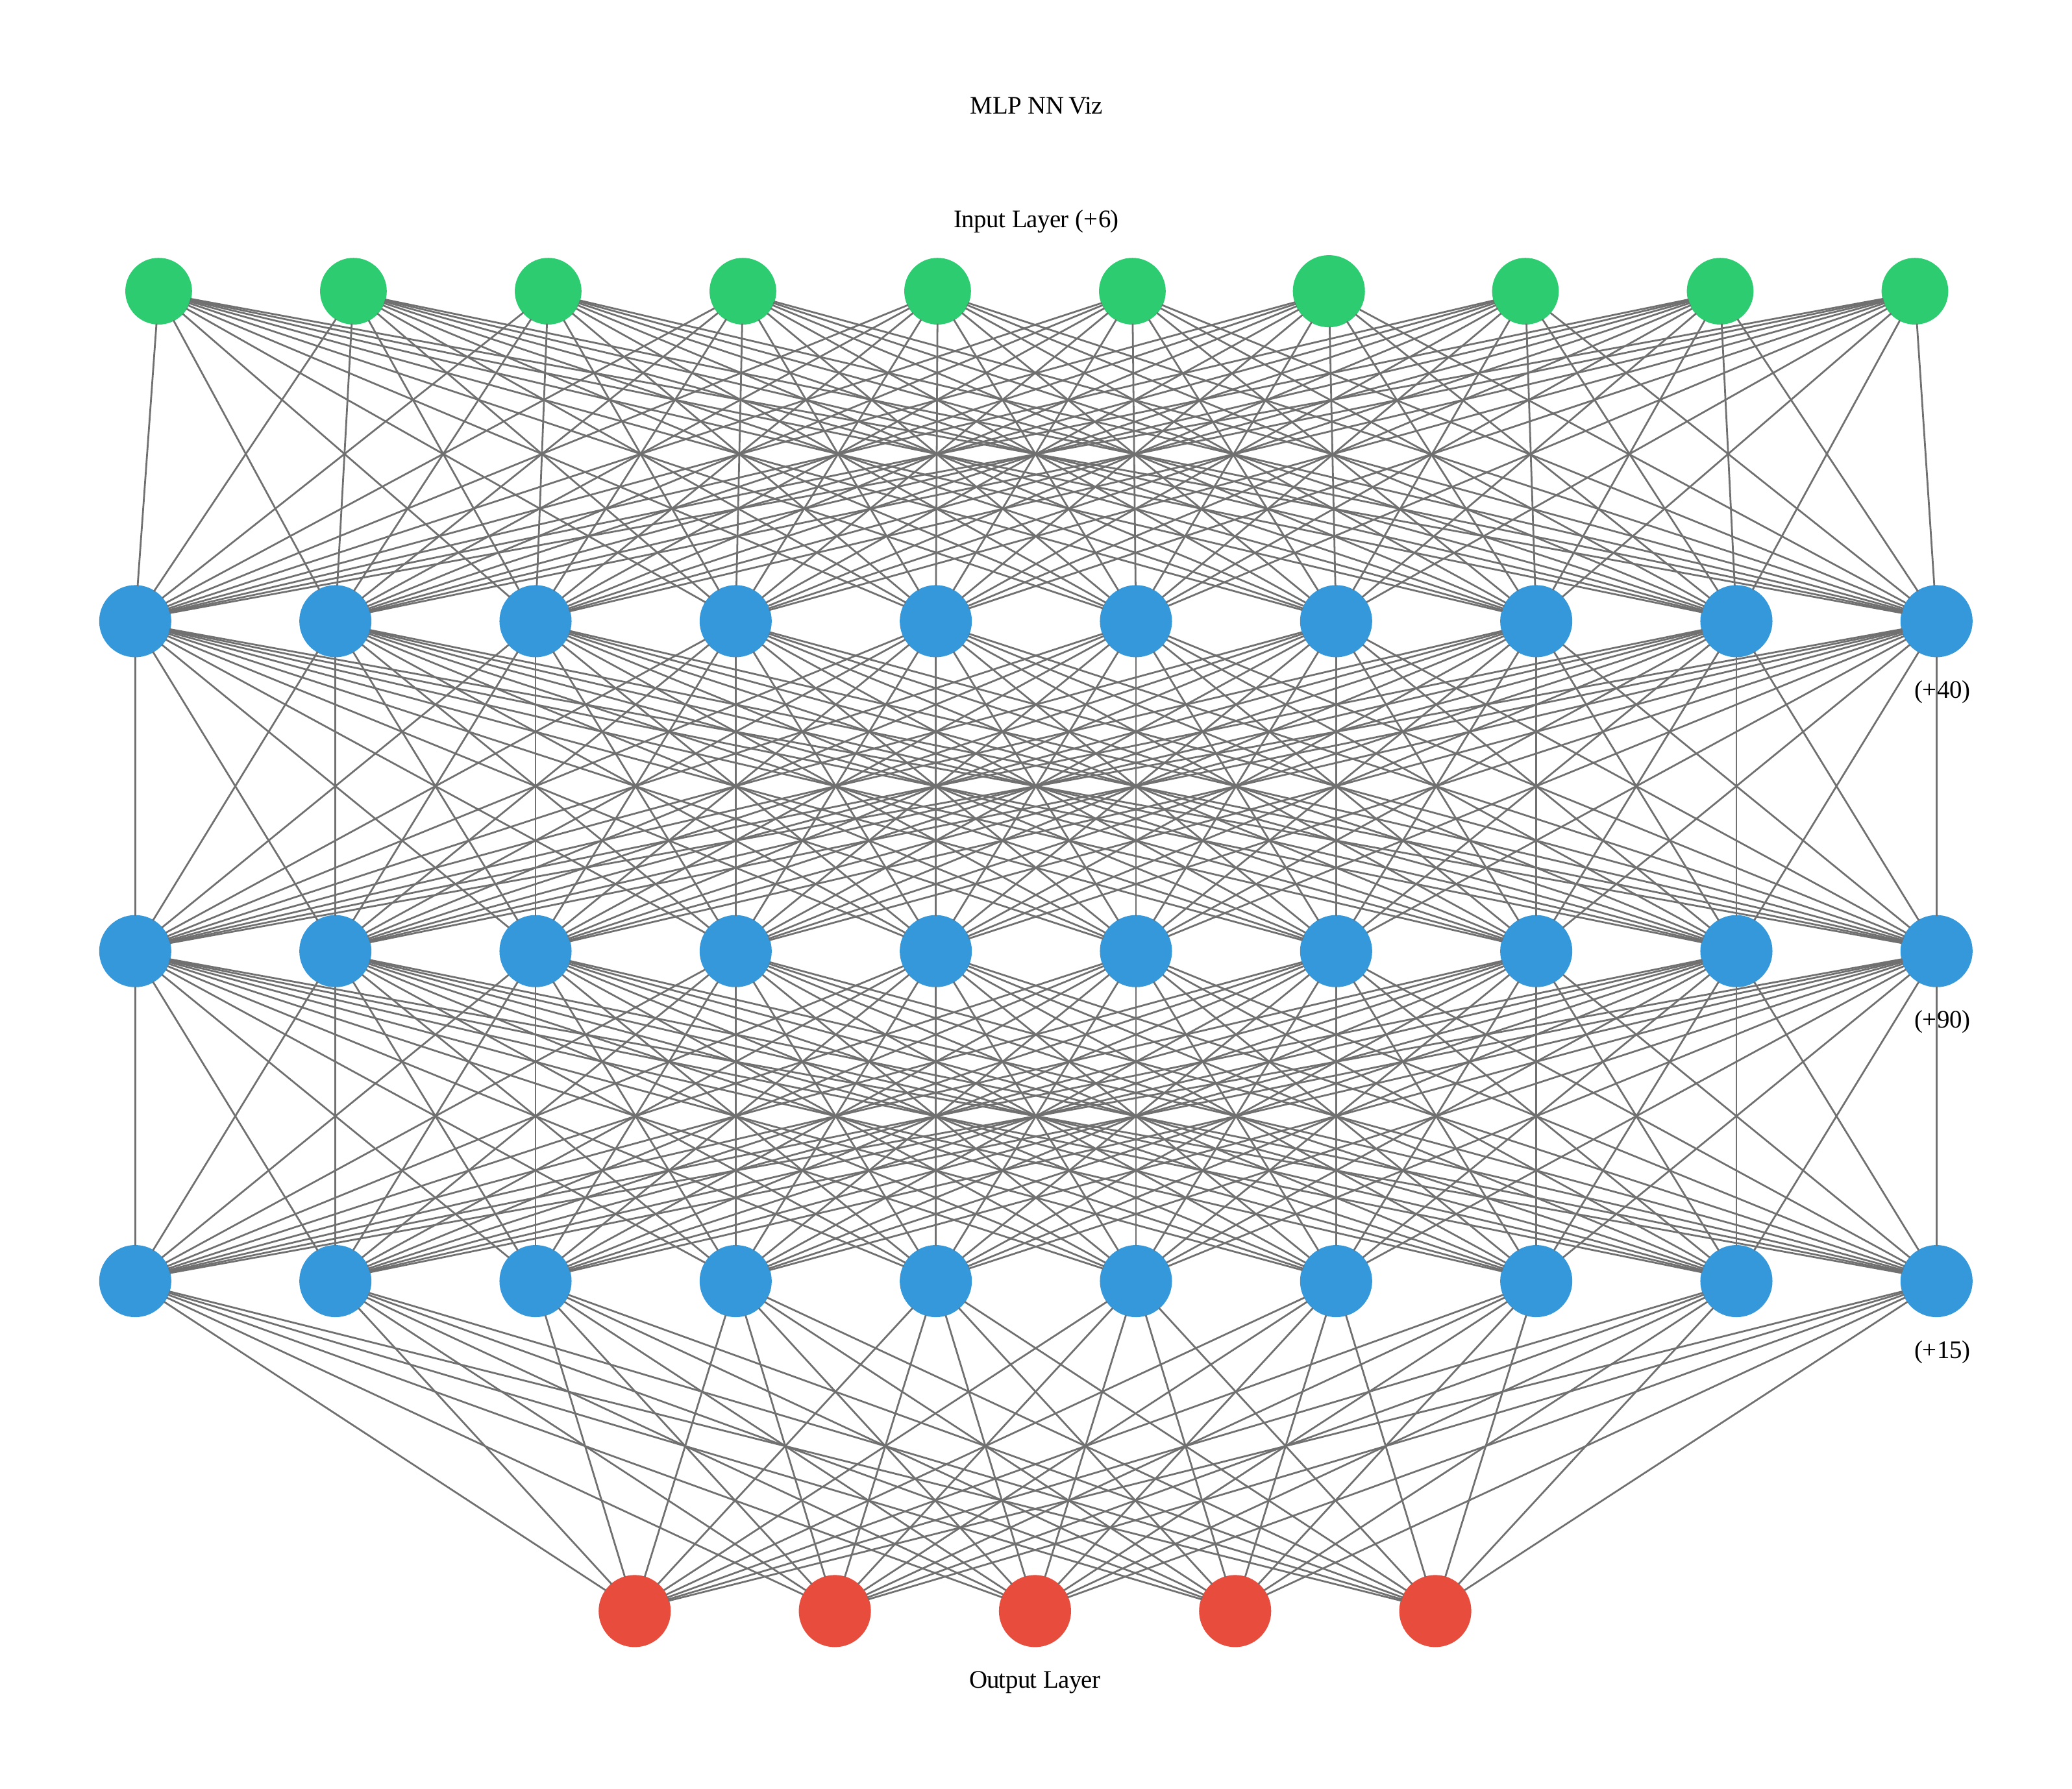

In [62]:
images = convert_from_path("/content/mlp_model.pdf")
images[0]